Investigating the sufficient condition for echo-states

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [6]:
np.arange(10)/10

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

In [10]:
np.arange(1/0.07)/(1/0.07)

array([0.  , 0.07, 0.14, 0.21, 0.28, 0.35, 0.42, 0.49, 0.56, 0.63, 0.7 ,
       0.77, 0.84, 0.91, 0.98])

In [87]:
def test_max_eigval(connectivityStepSize=0.01, units=100, trials=100, verbose=False):
    max_eig_arr = []
    conn_factors = np.arange(1/connectivityStepSize)/(1/connectivityStepSize)
    for x in conn_factors:
        if verbose: print(f'starting: x={x}')
        max_eig = 0
        for i in range(trials):
            A = np.random.choice([0,-1,1], (units,units), p=[1-x, x/2, x/2])
            vals, vects = np.linalg.eig(A)
            max_eig += max(abs(vals))/trials
        max_eig_arr.append(max_eig)
    return np.array(list(zip(conn_factors, max_eig_arr)))

In [89]:
res_n_100 = test_max_eigval(connectivityStepSize=0.01, units=100, trials=100, verbose=False)
print('done 100')
res_n_200 = test_max_eigval(connectivityStepSize=0.01, units=200, trials=100, verbose=False)
print('done 200')
res_n_300 = test_max_eigval(connectivityStepSize=0.01, units=300, trials=100, verbose=False)
print('done 300')

done 100
done 200
done 300


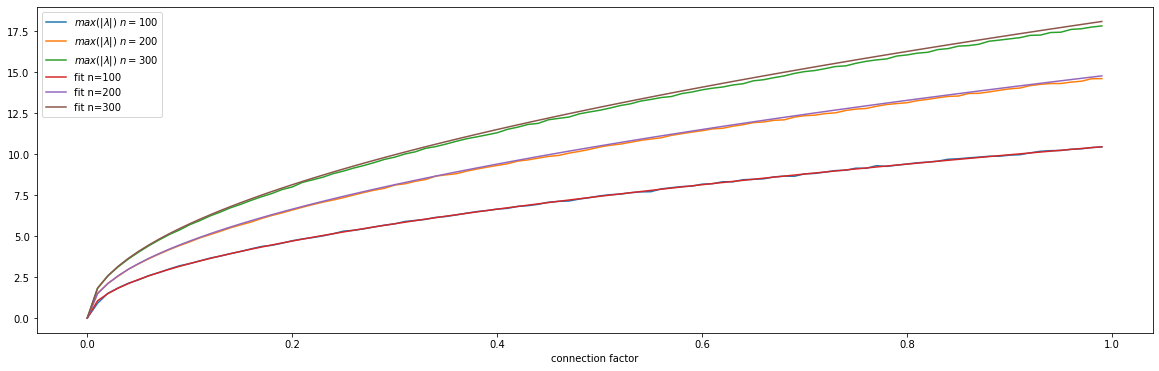

In [92]:
fig, axs = plt.subplots(1, figsize=(20, 6))
axs.plot(res_n_100[:,0], res_n_100[:,1], label=r'$max(|\lambda|)\ n=100$')
axs.plot(res_n_200[:,0], res_n_200[:,1], label=r'$max(|\lambda|)\ n=200$')
axs.plot(res_n_300[:,0], res_n_300[:,1], label=r'$max(|\lambda|)\ n=300$')
axs.plot(res_n_100[:,0], 10.5*res_n_100[:,0]**0.5, label='fit n=100')
axs.plot(res_n_100[:,0], 10.5*(2*res_n_100[:,0])**0.5, label='fit n=200')
axs.plot(res_n_100[:,0], 10.5*(3*res_n_100[:,0])**0.5, label='fit n=300')
axs.set_xlabel('connection factor')
axs.legend()
plt.show()

In [97]:
res_n_100 = test_max_eigval(connectivityStepSize=0.02, units=100, trials=5, verbose=False)
print('done 100')
res_n_200 = test_max_eigval(connectivityStepSize=0.02, units=200, trials=5, verbose=False)
print('done 200')
res_n_300 = test_max_eigval(connectivityStepSize=0.02, units=300, trials=5, verbose=False)
print('done 300')
res_n_400 = test_max_eigval(connectivityStepSize=0.02, units=400, trials=5, verbose=False)
print('done 400')
res_n_500 = test_max_eigval(connectivityStepSize=0.02, units=500, trials=5, verbose=False)
print('done 500')

done 100
done 200
done 300
done 400
done 500


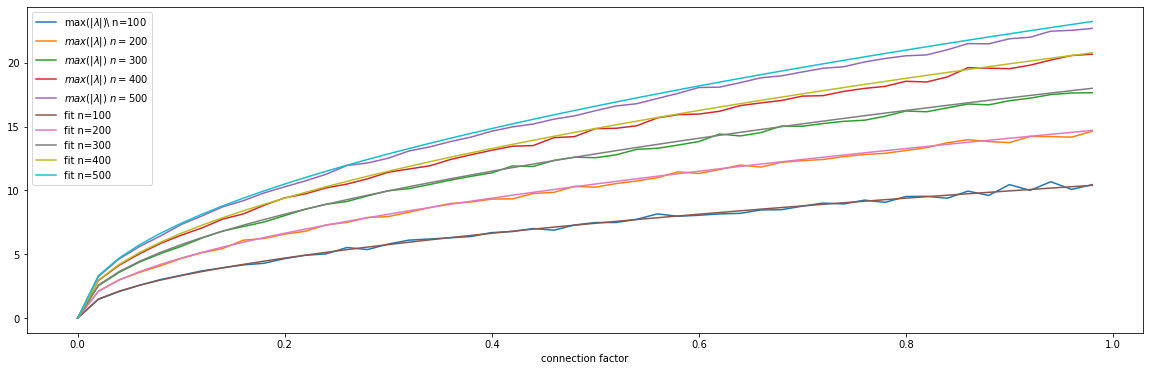

In [102]:
fig, axs = plt.subplots(1, figsize=(20, 6))
axs.plot(res_n_100[:,0], res_n_100[:,1], label=r'max(|$\lambda$|)\ n=100')
axs.plot(res_n_200[:,0], res_n_200[:,1], label=r'$max(|\lambda|)\ n=200$')
axs.plot(res_n_300[:,0], res_n_300[:,1], label=r'$max(|\lambda|)\ n=300$')
axs.plot(res_n_400[:,0], res_n_400[:,1], label=r'$max(|\lambda|)\ n=400$')
axs.plot(res_n_500[:,0], res_n_500[:,1], label=r'$max(|\lambda|)\ n=500$')
axs.plot(res_n_100[:,0], 10.5*(1*res_n_100[:,0])**0.5, label='fit n=100')
axs.plot(res_n_200[:,0], 10.5*(2*res_n_200[:,0])**0.5, label='fit n=200')
axs.plot(res_n_300[:,0], 10.5*(3*res_n_300[:,0])**0.5, label='fit n=300')
axs.plot(res_n_400[:,0], 10.5*(4*res_n_400[:,0])**0.5, label='fit n=400')
axs.plot(res_n_500[:,0], 10.5*(5*res_n_500[:,0])**0.5, label='fit n=500')
axs.set_xlabel('connection factor')
axs.legend()
plt.show()

In [113]:
def getScaleFactor(connectivity, units=100, tgtVal=1):
    if connectivity == 0:
        return 1
    else:
        return tgtVal*1/(10.5*np.sqrt(units/100*connectivity))

In [131]:
x = 0.5
A = np.random.choice([0,-1,1], (300,300), p=[1-x, x/2, x/2])
AA = A*getScaleFactor(x, units=300, tgtVal=0.85)
vals, vects = np.linalg.eig(AA)
max(abs(vals))

0.8311063786432947

In [134]:
trials = 20
connectivityStepSize = 0.01
conn_factors = np.arange(1/connectivityStepSize)/(1/connectivityStepSize)
pts_arr = []
for x in conn_factors:
    print(f'starting x={x}')
    for i in range(trials):
        A = np.random.choice([0,-1,1], (300,300), p=[1-x, x/2, x/2])
        AA = A*getScaleFactor(x, units=300, tgtVal=0.75)
        vals, vects = np.linalg.eig(AA)
        pts_arr.append(np.array([x, max(abs(vals))]))
pts_np = np.array(pts_arr)

starting x=0.0
starting x=0.01
starting x=0.02
starting x=0.03
starting x=0.04
starting x=0.05
starting x=0.06
starting x=0.07
starting x=0.08
starting x=0.09
starting x=0.1
starting x=0.11
starting x=0.12
starting x=0.13
starting x=0.14
starting x=0.15
starting x=0.16
starting x=0.17
starting x=0.18
starting x=0.19
starting x=0.2
starting x=0.21
starting x=0.22
starting x=0.23
starting x=0.24
starting x=0.25
starting x=0.26
starting x=0.27
starting x=0.28
starting x=0.29
starting x=0.3
starting x=0.31
starting x=0.32
starting x=0.33
starting x=0.34
starting x=0.35
starting x=0.36
starting x=0.37
starting x=0.38
starting x=0.39
starting x=0.4
starting x=0.41
starting x=0.42
starting x=0.43
starting x=0.44
starting x=0.45
starting x=0.46
starting x=0.47
starting x=0.48
starting x=0.49
starting x=0.5
starting x=0.51
starting x=0.52
starting x=0.53
starting x=0.54
starting x=0.55
starting x=0.56
starting x=0.57
starting x=0.58
starting x=0.59
starting x=0.6
starting x=0.61
starting x=0.62

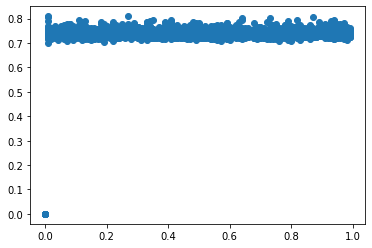

In [136]:
plt.scatter(pts_np[:,0],pts_np[:,1])

In [137]:
getScaleFactor(0.05, units=300, tgtVal=0.85)

0.20901814884293995

In [152]:
x = 0.05
# A = np.random.choice([0,-1,1], (10,10), p=[1-x, x/2, x/2])
A = np.random.choice([0,1], (100,100), p=[1-x, x])
vals, vects = np.linalg.eig(A)
max(abs(vals))

4.862916506083266